In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv("/Users/shivam/Documents/ml/csv_result-messidor_features.csv")

In [3]:
dataset.head()

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [7]:
dataset.columns

Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', 'Class'],
      dtype='object')

In [3]:
x_data = dataset[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18']]

In [12]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


In [5]:
y_data = dataset[['Class']]

In [14]:
y_data.head()


,Class
0,0
1,0
2,1
3,0
4,1


In [6]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler().fit(x_data)
x_data = rob.transform(x_data)

In [11]:
x_data

array([[ 0.        ,  0.        , -0.33333333, ..., -0.89196242,
        -0.27732011,  1.        ],
       [ 0.        ,  0.        , -0.28205128, ..., -0.05880263,
         1.58839106,  0.        ],
       [ 0.        ,  0.        ,  0.69230769, ...,  0.18611033,
         0.92152824,  0.        ],
       ...,
       [ 0.        , -1.        ,  0.35897436, ...,  0.91447892,
         0.97595831,  0.        ],
       [ 0.        ,  0.        ,  0.1025641 , ..., -0.91477294,
         0.00281607,  1.        ],
       [ 0.        ,  0.        , -0.71794872, ...,  0.80569405,
        -0.74251849,  0.        ]])

,Class
0,0
1,0
2,1
3,0
4,1
...,...
1146,0
1147,0
1148,0
1149,1


In [7]:
arr = y_data.values.ravel()

In [46]:
cross_val_score(RandomForestClassifier(n_estimators=50), x_data, arr,cv=5)

array([0.6969697 , 0.65652174, 0.71304348, 0.65652174, 0.67826087])

In [45]:
arr

array([0, 0, 1, ..., 0, 1, 0])

In [43]:

scores1 = cross_val_score(RandomForestClassifier(n_estimators=50),x_data, arr, cv=5)
np.average(scores1)

0.6802371541501977

In [44]:

scores2 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr', C=100),x_data, arr, cv=5)
np.average(scores2)

0.7454470167513645

In [51]:
scores3 = cross_val_score(SVC(gamma='auto'),x_data, arr, cv=5)
np.average(scores3)

0.6759307359307358

In [8]:

scores = []
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'p': [1,2],
            'n_neighbors': [1,100],
            'leaf_size' : [1,100]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,50]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,500]
        }
    },
    'adaboost' : {
        'model' : AdaBoostClassifier(),
        'params' : {
            'learning_rate' : [.01,.1, 1],
            'n_estimators': [500, 1000, 2000]
        }
    },
    'dt' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'max_leaf_nodes' : [2,2000],
            'min_samples_split' :   [2,3,10],
        }
    },
}

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_data, arr)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
did = pd.DataFrame(scores,columns=['model','best_score','best_params'])
did

,model,best_score,best_params
0,knn,0.642037,"{'leaf_size': 1, 'n_neighbors': 100, 'p': 1}"
1,random_forest,0.680275,{'n_estimators': 50}
2,logistic_regression,0.748059,{'C': 500}
3,adaboost,0.709802,"{'learning_rate': 1, 'n_estimators': 2000}"
4,dt,0.606418,"{'max_leaf_nodes': 2000, 'min_samples_split': 10}"


In [9]:
from sklearn.ensemble import VotingClassifier
m = VotingClassifier(
    estimators=[('lr', LogisticRegression(max_iter=100000, C=500)), 
                ('rf', RandomForestClassifier(n_estimators=50)), 
                ('dt', DecisionTreeClassifier(max_leaf_nodes=1000, min_samples_split=4)),
                ('ADB', AdaBoostClassifier(learning_rate=1, n_estimators=2000)),
                ('KNN', KNeighborsClassifier(leaf_size=1, n_neighbors=100, p=1))], 
    voting='hard')

m.fit(x_data, arr)

VotingClassifier(estimators=[('lr', LogisticRegression(C=500, max_iter=100000)),
                             ('rf', RandomForestClassifier(n_estimators=50)),
                             ('dt',
                              DecisionTreeClassifier(max_leaf_nodes=1000,
                                                     min_samples_split=4)),
                             ('ADB',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=2000)),
                             ('KNN',
                              KNeighborsClassifier(leaf_size=1, n_neighbors=100,
                                                   p=1))])

In [10]:
m.score(x_data, arr)

0.9913119026933102

In [11]:
y_pred = m.predict(x_data)

In [12]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [13]:
y_data = arr
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=4)

for train_index, test_index in folds.split(x_data,y_data):
    
    x_train, x_test, y_train, y_test = x_data[train_index], x_data[test_index], \
                                       y_data[train_index], y_data[test_index]

In [17]:
y_pred = m.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_pred)
cm

array([[135,   0],
       [  3, 149]])

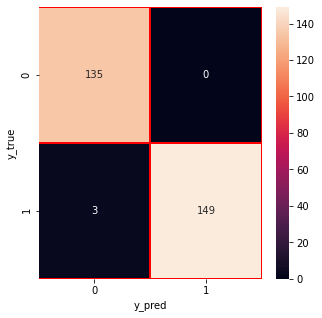

In [18]:
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       135
           1       1.00      0.98      0.99       152

    accuracy                           0.99       287
   macro avg       0.99      0.99      0.99       287
weighted avg       0.99      0.99      0.99       287

